# Apple or Tomatoes - Artificial Neural Network
![image](https://storage.googleapis.com/kaggle-datasets-images/2702329/4651548/a85ddc5e31ffe4cf89906ae5062a97bf/dataset-cover.jpg?t=2022-12-04-11-54-56)

In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
import re

#### Rename ımage

In [2]:
def renamed_image(path, line):
    i = 1
    for filename in os.listdir(path):
        try:
        
            f, extension = os.path.splitext(filename)
            name = path + filename
            new_name = path + line + str(i) + extension
            os.rename(name, new_name)
            i = i + 1
        except Exception as e:
            i = i + 1
            print(e)
            continue
            
apples = "apples"
tomatoes = "tomatoes"

path_test_apples = "test//apples//"
path_train_apples = "train//apples//"
path_test_tomatoes = "test//tomatoes//"
path_train_tomatoes = "train//tomatoes//"

renamed_image(path_test_apples, apples)
renamed_image(path_train_apples, apples)
renamed_image(path_test_tomatoes, tomatoes)
renamed_image(path_train_tomatoes, tomatoes)

[WinError 183] Halen varolan bir dosya oluşturulamaz: 'test//apples//apples10.jpeg' -> 'test//apples//apples2.jpeg'
[WinError 183] Halen varolan bir dosya oluşturulamaz: 'test//apples//apples11.jpeg' -> 'test//apples//apples3.jpeg'
[WinError 183] Halen varolan bir dosya oluşturulamaz: 'test//apples//apples12.jpeg' -> 'test//apples//apples4.jpeg'
[WinError 183] Halen varolan bir dosya oluşturulamaz: 'test//apples//apples13.jpeg' -> 'test//apples//apples5.jpeg'
[WinError 183] Halen varolan bir dosya oluşturulamaz: 'test//apples//apples14.jpeg' -> 'test//apples//apples6.jpeg'
[WinError 183] Halen varolan bir dosya oluşturulamaz: 'test//apples//apples15.jpeg' -> 'test//apples//apples7.jpeg'
[WinError 183] Halen varolan bir dosya oluşturulamaz: 'test//apples//apples16.jpeg' -> 'test//apples//apples8.jpeg'
[WinError 183] Halen varolan bir dosya oluşturulamaz: 'test//apples//apples17.jpeg' -> 'test//apples//apples9.jpeg'
[WinError 183] Halen varolan bir dosya oluşturulamaz: 'test//apples//app

#### Resize Image

In [3]:
def resized_imaged(path):
    for filename in os.listdir(path):
        try:
            img = Image.open(path + filename)
            new_img = img.resize((64, 64))
            new_img.save(path + filename)
        except Exception as e:
            continue
            
resized_imaged(path_test_tomatoes)
resized_imaged(path_train_tomatoes)
resized_imaged(path_test_apples)
resized_imaged(path_train_apples)

#### Eğitim sürecini yeniden boyutlandır.

In [4]:
def get_image(path):
    all_image_array = []
    label_array = []
    
    for filename in os.listdir(path):
        try:
            if re.match(r"apples", filename):
                label_array.append(1)
            else:
                label_array.append(0)

            img = Image.open(path + filename)
            img_array = np.asarray(img)

            all_image_array.append(img_array)
        except Exception as e:
            continue
    return np.array(all_image_array), np.array(label_array).reshape(1, -1)

x_test_apples, y_test_apples = get_image(path_test_apples)
x_train_apples, y_train_apples = get_image(path_train_apples)
x_test_tomatoes, y_test_tomatoes = get_image(path_test_tomatoes)
x_train_tomatoes, y_train_tomatoes = get_image(path_train_tomatoes)

In [5]:
print("x_test_apples: ", x_test_apples.shape)
print("x_train_apples: ", x_train_apples.shape)
print("x_test_tomatoes: ", x_test_tomatoes.shape)
print("x_train_tomatoes: ", x_train_tomatoes.shape)

print("-----------------------------")

print("y_test_apples: ", y_test_apples.shape)
print("y_train_apples: ", y_train_apples.shape)
print("y_test_tomatoes: ", y_test_tomatoes.shape)
print("y_train_tomatoes: ", y_train_tomatoes.shape)

x_test_apples:  (54, 64, 64, 3)
x_train_apples:  (160, 64, 64, 3)
x_test_tomatoes:  (43, 64, 64, 3)
x_train_tomatoes:  (130, 64, 64, 3)
-----------------------------
y_test_apples:  (1, 54)
y_train_apples:  (1, 160)
y_test_tomatoes:  (1, 43)
y_train_tomatoes:  (1, 130)


In [6]:
x_train = np.concatenate((x_train_apples, x_train_tomatoes), axis = 0)
print("x_train shape: ", x_train.shape)

x_test = np.concatenate((x_test_apples, x_test_tomatoes), axis = 0)
print("x_test shape: ", x_test.shape)

y_train = np.concatenate((y_train_apples.T, y_train_tomatoes.T), axis = 0)
y_train = y_train.T
print("y_train shape: ", y_train.shape)

y_test = np.concatenate((y_test_apples.T, y_test_tomatoes.T), axis = 0)
y_test = y_test.T
print("y_test shape: ", y_test.shape)

x_train shape:  (290, 64, 64, 3)
x_test shape:  (97, 64, 64, 3)
y_train shape:  (1, 290)
y_test shape:  (1, 97)


#### Create classes

In [7]:
class_list = ["tomatoes", "apples"]
classes = np.array(class_list)

y: [0]  It is a tomatoes


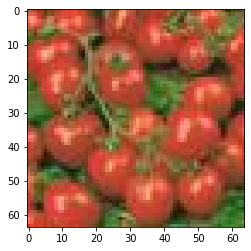

In [8]:
index = 200
plt.imshow(x_train[index])
print("y: " + str(y_train[:, index]) + "  It is a " + str(np.squeeze(classes[y_train[:, index]])))
plt.show()

#### Flatten Image

In [9]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1).T
x_test_flatten = x_test.reshape(x_test.shape[0], -1).T

print("x_test shape: ", x_test_flatten.shape)
print("x_train shape: ", x_train_flatten.shape)

x_test shape:  (12288, 97)
x_train shape:  (12288, 290)


In [10]:
x_train = x_train_flatten / 255
x_test = x_test_flatten / 255

In [11]:
print("x_test shape: ", x_test.shape)
print("x_train shape: ", x_train.shape)


x_test shape:  (12288, 97)
x_train shape:  (12288, 290)


## Artificial Neural Network

### 1. Initialize paramaters

In [12]:
def initialize_weight_and_bias_NN(x_train, y_train):
    paramaters = {
        "w1": np.random.randn(3, x_train.shape[0]) * 0.1,
        "b1": np.zeros((3, 1)),
        "w2": np.random.randn(y_train.shape[0], 3) * 0.1,
        "b2": np.zeros((y_train.shape[0], 1))
    }
    return paramaters

### 2. Sigmoid Function

In [13]:
def sigmoid_NN(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

### 3. Forward Propogation

In [14]:
def forward_propogation_NN(x_train, paramaters):
    Z1 = np.dot(paramaters["w1"], x_train) + paramaters["b1"]
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(paramaters["w2"], A1) + paramaters["b2"]
    A2 = sigmoid_NN(Z2)
    
    cache = {
        "A1": A1,
        "Z1": Z1,
        "A2": A2,
        "Z2": Z2
    }
    
    return A2, cache

### 4. Cost Function 

In [15]:
def cost_function_NN(y_train, A2):
    loss = np.multiply(np.log(A2), y_train)
    cost = - np.sum(loss)/y_train.shape[1]
    return cost

### 5. Backward Propogation 

In [16]:
def backward_propogation_NN(x_train, y_train, cache, paramaters):
    dz2 = cache["A2"] - y_train
    dw2 = np.dot(dz2, cache["A1"].T)/x_train.shape[1]
    db2 = np.sum(dz2, axis = 1, keepdims = True) / x_train.shape[1]
    
    dz1 = np.dot(paramaters["w2"].T, dz2) * (1 - np.power(cache["A1"], 2))
    dw1 = np.dot(dz1, x_train.T) / x_train.shape[1]
    db1 = np.sum(dz1, axis = 1, keepdims = True) / x_train.shape[1]    
    
    grads = {
        "dw1": dw1,
        "db1": db1,
        "dw2": dw2,
        "db2": db2
    }
    
    return grads

### 6. Update

In [17]:
def update_NN(grads, paramaters, learning_rate):
    paramaters = {
        "w1": paramaters["w1"] - grads["dw1"] * learning_rate,
        "b1": paramaters["b1"] - grads["db1"] * learning_rate,
        "w2": paramaters["w2"] - grads["dw2"] * learning_rate,
        "b2": paramaters["b2"] - grads["db2"] * learning_rate
    }
    return paramaters

### 7. Predict

In [18]:
def predict_NN(x_test, paramaters):
    A2, cache = forward_propogation_NN(x_test, paramaters)
    y_predict = np.zeros((1, x_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0, i] >= 0.5:
            y_predict[0, i] = 1
        else:
            y_predict[0, i] = 0
    return y_predict   

### Arficial Neural Network

In [19]:
def artificial_neural_network(x_train, y_train, x_test, y_test, learning_rate, number_iteration, print_cost):
    paramaters = initialize_weight_and_bias_NN(x_train, y_train)
    cost_list = []
    index_list = []
    
    for i in range(number_iteration):
        # forward propogation
        A2, cache = forward_propogation_NN(x_train, paramaters)
        
        # cost function
        cost = cost_function_NN(y_train, A2)
        
        # backwark propogation
        grads = backward_propogation_NN(x_train, y_train, cache, paramaters)
        
        # update
        paramaters = update_NN(grads, paramaters, learning_rate)
        
        if i%100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            if print_cost: 
                print("Number iteration {}:{}".format(i, cost))
            
    
    plt.plot(index_list, cost_list)
    plt.ylabel("Cost")
    plt.xlabel("Number iteration")
    plt.show()
    
    y_predict_train = predict_NN(x_train, paramaters)
    y_predict_test = predict_NN(x_test, paramaters)
    
    print("Test accuracy: {}".format(100 - np.mean(np.abs(y_predict_test - y_test)) * 100))
    print("Train accuracy: {}".format(100 - np.mean(np.abs(y_predict_train - y_train)) * 100))
    
    d = {
        "cost": cost,
        "cache": cache,
        "grads": grads,
        "paramaters": paramaters
    }
    return d

Number iteration 0:0.37537030907247004
Number iteration 100:0.3628479455265236
Number iteration 200:0.3567010584892113
Number iteration 300:0.35098997779580365
Number iteration 400:0.34724039713692456
Number iteration 500:0.3447353487223999
Number iteration 600:0.34267776831161345
Number iteration 700:0.34085456931736063
Number iteration 800:0.3392463251234447
Number iteration 900:0.33780841974566095
Number iteration 1000:0.33643608518801577
Number iteration 1100:0.33503661324956047
Number iteration 1200:0.33356842840355627
Number iteration 1300:0.3320276010224677
Number iteration 1400:0.33042597985572136
Number iteration 1500:0.3287801633250088
Number iteration 1600:0.3271081370703176
Number iteration 1700:0.32542853206209665
Number iteration 1800:0.323760245060231
Number iteration 1900:0.3221217154107828
Number iteration 2000:0.3205296508823553
Number iteration 2100:0.3189968699018166
Number iteration 2200:0.31752836404527046
Number iteration 2300:0.31611464615358076
Number iteration

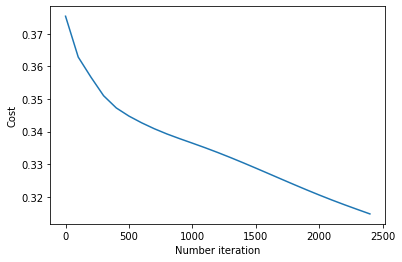

Test accuracy: 62.88659793814433
Train accuracy: 63.793103448275865


In [20]:
d = artificial_neural_network(x_train, y_train, x_test, y_test, learning_rate = 0.001, number_iteration = 2500, print_cost = True)

### Learning Rate Plot

learning rate:  0.01


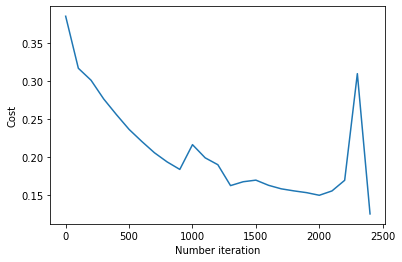

Test accuracy: 68.04123711340206
Train accuracy: 89.65517241379311

 ------------------ 

learning rate:  0.001


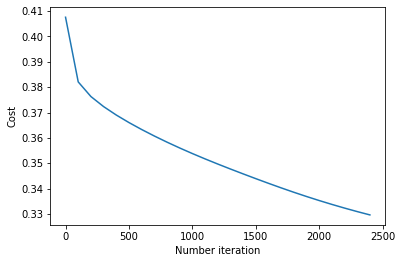

Test accuracy: 50.51546391752577
Train accuracy: 61.724137931034484

 ------------------ 

learning rate:  0.0001


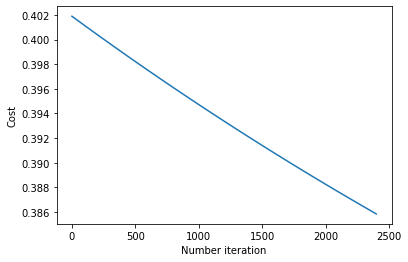

Test accuracy: 45.36082474226804
Train accuracy: 44.13793103448276

 ------------------ 



In [21]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("learning rate: ", i)
    models[str(i)] = artificial_neural_network(x_train, y_train, x_test, y_test, learning_rate = i, number_iteration = 2500, print_cost = False)
    print("\n ------------------ \n")

## My image prediction 

İt is a 59% apples


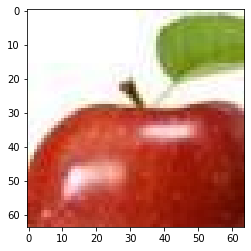

In [22]:
my_image = Image.open("test//apples//apples20.jpeg")

img_resize = my_image.resize((64, 64))
np_array = np.asarray(img_resize)

img_flatten = np_array / 255
my_image = img_flatten.reshape(1, -1).T

my_image_predict = predict_NN(my_image, d["paramaters"]) 
print("İt is a " + str(int(100-np.mean(np.abs(my_image_predict - my_image)) * 100)) + "% " + classes[int(np.squeeze(my_image_predict))])
plt.imshow(img_resize)
plt.show()

## L-Layer Artificial Neural Network

In [23]:
x_train, y_train, x_test, y_test = x_train.T, y_train.T, x_test.T, y_test.T

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units = 16, kernel_initializer = "uniform", activation = "relu", input_dim = x_train.shape[1]))
classifier.add(Dense(units = 8, kernel_initializer = "uniform", activation = "relu"))
classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

classifier.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

loss, acccuracy = classifier.evaluate(x_test, y_test)
print("loss: ", loss)
print("acccuracy: ", acccuracy)

Epoch 1/100
10/10 [==============================] - 1s 15ms/step - loss: 0.6827 - accuracy: 0.5517 - val_loss: 0.6704 - val_accuracy: 0.5567
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.5517 - val_loss: 0.6668 - val_accuracy: 0.5567
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6676 - accuracy: 0.5517 - val_loss: 0.6625 - val_accuracy: 0.5567
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6652 - accuracy: 0.5517 - val_loss: 0.6595 - val_accuracy: 0.5464
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.5862 - val_loss: 0.6613 - val_accuracy: 0.5876
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6661 - accuracy: 0.6690 - val_loss: 0.6560 - val_accuracy: 0.5773
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.5862 - val_loss: 0.6491 - val_accuracy: 0.6082
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3633 - accuracy: 0.8586 - val_loss: 0.8138 - val_accuracy: 0.5670
Epoch 60/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3496 - accuracy: 0.8310 - val_loss: 0.6860 - val_accuracy: 0.6392
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3195 - accuracy: 0.8724 - val_loss: 0.6676 - val_accuracy: 0.6804
Epoch 62/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2918 - accuracy: 0.8931 - val_loss: 0.7004 - val_accuracy: 0.6907
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2899 - accuracy: 0.8828 - val_loss: 0.7033 - val_accuracy: 0.7010
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2913 - accuracy: 0.8759 - val_loss: 0.7362 - val_accuracy: 0.7113
Epoch 65/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2695 - accuracy: 0.8931 - val_loss: 0.7069 - val_accuracy: 0.6907
Epoch 

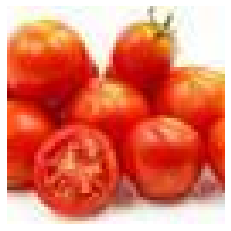

In [25]:
my_img = Image.open("test//tomatoes//tomatoes3.jpeg")

img_resize = my_img.resize((64, 64))
np_array = np.array(img_resize)

img_flatten = np_array / 255
new_my_img = img_flatten.reshape(1, -1)

prediction = classifier.predict(new_my_img)
if prediction > 0.5:
    index = 1
else:
    index = 0
plt.imshow(my_img)
plt.axis("off")
plt.show()